In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(argument):
    return 1/(1+np.exp(-argument))


class Classification:
    def __init__(self, x_data, y_data):
        self.input = x_data   #to normalized classifications, it will change to x_data normalized
        self.x_data = x_data
        self.y_data = y_data
        self.weights = np.ones(x_data.shape[1])
        self.bias = 1

    def fit_parameters(self, learning_rate, epochs):
        m, n = self.x_data.shape 
        error_per_iteration = []

        for i in range(epochs):
            argument = np.dot(self.x_data, self.weights) + self.bias
            prediction = sigmoid(argument) 
            loss = prediction - self.y_data
            error = (1/m) * np.sum(loss)
            
            dw = (1/m) * np.dot(self.x_data.T, loss)
            db = (1/m) * np.sum(loss)

            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db
            #print("iteration i: {}, error: {}".format(i, error))
            error_per_iteration.append(error)

        return error_per_iteration



    def predict(self,x_predict):
        argument = np.dot(x_predict, self.weights) + self.bias
        sigmoid_pred = sigmoid(argument)
        prediction = np.vectorize(lambda x: 1 if x>= 0.5 else 0)(sigmoid_pred)
        return prediction


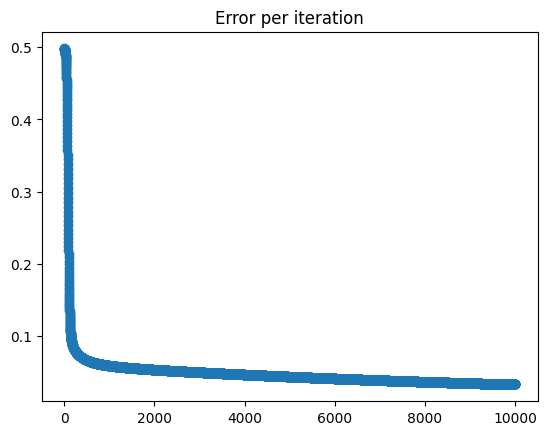

array(1)

In [6]:
x_data = np.array([[2, 4], [1, 3], [5, 1], [6, 3], [3, 2], [4, 4]])
y_data = np.array([0, 0, 1, 1, 0, 1])

c1 = Classification(x_data, y_data)
errors = c1.fit_parameters(0.01, 10000)
pred = c1.predict([5,1])
plt.scatter(np.arange(10000), errors)
plt.title("Error per iteration")
plt.show()

pred


In [32]:
y_data.shape

(6,)